In [2]:
#Menghubungkan Google Colab dengan Google Drive :
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Basic Computation
import pandas as pd
import os

In [4]:
def load_images_from_folder(folder,only_path = False, label = ""):
    if only_path == False:
        images = []
        for filename in os.listdir(folder):
            img = plt.imread(os.path.join(folder,filename))
            if img is not None:
                images.append(img)
        return images
    else:
        path = []
        for filename in os.listdir(folder):
            img_path = os.path.join(folder,filename)
            if img_path is not None:
                path.append([label,img_path])
        return path

In [5]:
images = []
dirp = "/content/drive/MyDrive/mango/Classification_dataset/"
for f in os.listdir(dirp):
    images += load_images_from_folder(dirp+f,True,label = f)

# membuat data frame
df = pd.DataFrame(images, columns = ["mangga", "path"])
df.head()

,mangga,path
0,Sindhri,/content/drive/MyDrive/mango/Classification_da...
1,Sindhri,/content/drive/MyDrive/mango/Classification_da...
2,Sindhri,/content/drive/MyDrive/mango/Classification_da...
3,Sindhri,/content/drive/MyDrive/mango/Classification_da...
4,Sindhri,/content/drive/MyDrive/mango/Classification_da...


In [ ]:
# visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# menampilkan jumlah gambar pada tiap category
vc = df["mangga"].value_counts()
plt.figure(figsize=(10,5))
sns.barplot(x = vc.index, y = vc, palette = "rocket")
plt.title("Jumlah gambar tiap category", fontsize = 15)
plt.show()

In [ ]:
# ## install library untuk pembagian dataset menjadi 3 yaitu train,test,val
# !pip install split_folders
# ## install library untuk pembagian dataset menjadi 3 yaitu train,test,val
# import splitfolders

In [ ]:
# pembagian dataset menjadi 3 yaitu train,test,val
#input_folders = '/content/drive/MyDrive/Musroom'
#output_folders = '/content/drive/MyDrive/Musroom/output_dataset'
#splitfolders.ratio(input_folders,output_folders, seed =42, ratio=(.7,.2,.1))

In [ ]:
# Importing Required Libraries
import cv2
import os
import tensorflow as tf
import matplotlib.pyplot as plt
from glob import glob
from keras.models import Sequential
from keras import models, layers, optimizers
from keras.layers import Conv2D, MaxPooling2D, Dropout, BatchNormalization
from keras.layers import Flatten, Dense
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model


Arsitektur Vgg16

In [ ]:
from keras.applications.vgg16 import VGG16

In [ ]:
base_model = tf.keras.applications.VGG16(
    include_top=False,
    input_shape=(224,224,3),
)

In [ ]:
# Mengunci semua layer base_model agar tidak terupdate selama pelatihan
for layer in base_model.layers:
    layer.trainable = False

# Membuat output layer kustom untuk jumlah kelas yang diinginkan
x = Flatten()(base_model.output)
x = Dense(256, activation='relu')(x)
x = Dense(8, activation='softmax')(x)

# Menggabungkan base model dengan output layer kustom
model = Model(inputs=base_model.input, outputs=x)

In [ ]:
model.summary()

Preprcessing

In [ ]:
# path data train dan data validation
val_path ='/content/drive/MyDrive/mango/Classification_dataset/output_dataset/val'
training_path ='/content/drive/MyDrive/mango/Classification_dataset/output_dataset/train'

# path data testing
testing_path ='/content/drive/MyDrive/mango/Classification_dataset/output_dataset/test'

In [ ]:
train_datagen = ImageDataGenerator (rescale = 1./255,
                                    zoom_range = 0.2,
                                    rotation_range = 20)

valid_datagen = ImageDataGenerator(rescale = 1./255)
testing_datagen = ImageDataGenerator(rescale=1./255)

Hyperparameter

In [ ]:
# Compile the Model
model.compile( loss='sparse_categorical_crossentropy',
               optimizer=tf.keras.optimizers.SGD(learning_rate=0.01),
               metrics=['accuracy'])

In [ ]:
 #Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/mango/Classification_dataset/output_dataset/train',
                                                 target_size = (224, 224),
                                                 batch_size = 16,
                                                 class_mode = 'sparse')

In [ ]:
valid_set = valid_datagen.flow_from_directory('/content/drive/MyDrive/mango/Classification_dataset/output_dataset/val',
                                            target_size = (224, 224),
                                            batch_size = 16,
                                            class_mode = 'sparse')

In [ ]:
testing_set = testing_datagen.flow_from_directory('/content/drive/MyDrive/mango/Classification_dataset/output_dataset/test',
                                                target_size=(224,224),
                                                batch_size=16,
                                                class_mode='sparse', shuffle=False)

Training dengan Arsitektur VGG16

In [21]:
# Fit the model
r = model.fit(
              training_set,
              validation_data=valid_set,
              epochs=60,
              steps_per_epoch=len(training_set),
              validation_steps=len(valid_set))

Epoch 1/60
70/70 [==============================] - 307s 4s/step - loss: 2.2459 - accuracy: 0.1295 - val_loss: 2.0779 - val_accuracy: 0.1156
Epoch 2/60
70/70 [==============================] - 27s 389ms/step - loss: 2.0803 - accuracy: 0.1321 - val_loss: 2.0723 - val_accuracy: 0.1312
Epoch 3/60
70/70 [==============================] - 26s 366ms/step - loss: 2.0809 - accuracy: 0.1143 - val_loss: 2.0796 - val_accuracy: 0.1250
Epoch 4/60
70/70 [==============================] - 24s 347ms/step - loss: 2.0797 - accuracy: 0.1196 - val_loss: 2.0794 - val_accuracy: 0.1250
Epoch 5/60
70/70 [==============================] - 25s 359ms/step - loss: 2.0789 - accuracy: 0.1375 - val_loss: 2.0689 - val_accuracy: 0.1844
Epoch 6/60
70/70 [==============================] - 24s 344ms/step - loss: 2.0665 - accuracy: 0.1482 - val_loss: 2.0445 - val_accuracy: 0.2188
Epoch 7/60
70/70 [==============================] - 26s 377ms/step - loss: 2.0494 - accuracy: 0.1545 - val_loss: 2.0156 - val_accuracy: 0.2406
E

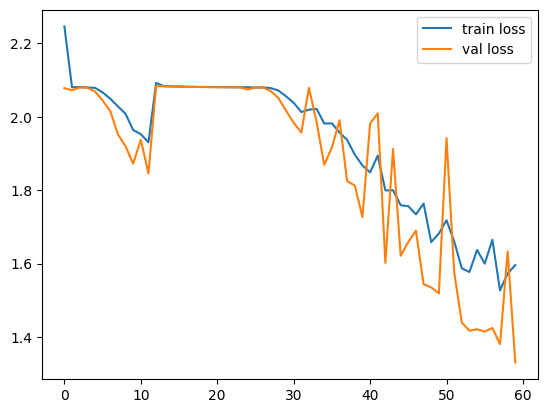

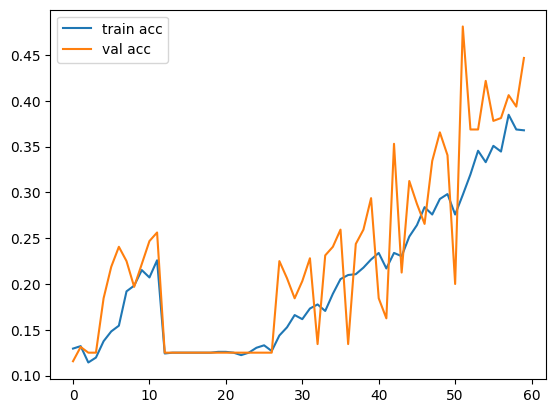

In [22]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()

In [23]:
scores_validasi = model.evaluate(valid_set)

20/20 [==============================] - 2s 116ms/step - loss: 1.3309 - accuracy: 0.4469


In [24]:
scores_train = model.evaluate(training_set)

70/70 [==============================] - 23s 322ms/step - loss: 1.3902 - accuracy: 0.4464


In [ ]:
#save model
model.save("/content/drive/MyDrive/Model/P4_SGD_0.01_E_60.h5")

In [26]:
model.save("/content/drive/MyDrive/Model/P4_SGD_0.01_E_60.hdf5")